<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-11-27 21:54:50.846347: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 21:54:51.056752: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 21:54:51.056916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 21:54:51.104807: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 21:54:51.220847: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 21:54:51.222598: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

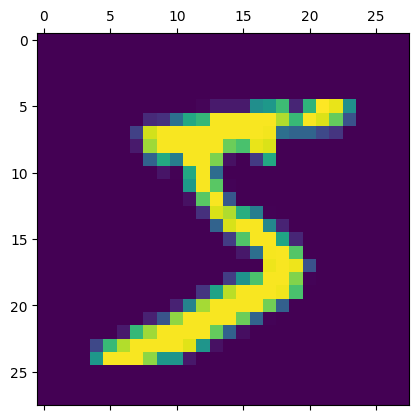

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

2023-11-27 21:54:54.825385: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 21:54:54.850748: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5


2023-11-27 21:54:55.362948: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 2s 984us/step - loss: 0.4701 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 1s 788us/step - loss: 0.3038 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 2s 951us/step - loss: 0.2836 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 744us/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 1s 749us/step - loss: 0.2666 - accuracy: 0.9257


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 595us/step - loss: 0.2677 - accuracy: 0.9263


[0.267718106508255, 0.9262999892234802]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 628us/step


array([1.8274473e-02, 3.9251847e-07, 9.3921803e-02, 9.5415401e-01,
       2.7595151e-03, 1.1898616e-01, 2.1510959e-06, 9.9979883e-01,
       9.4445176e-02, 6.4008743e-01], dtype=float32)

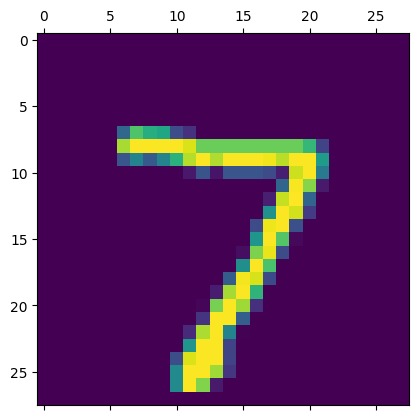

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1110,    4,    1,    0,    1,    4,    2,   13,    0],
       [   4,    7,  937,   12,   11,    3,   11,    8,   35,    4],
       [   3,    0,   30,  889,    0,   37,    2,   10,   29,   10],
       [   1,    1,    5,    0,  916,    0,   10,    3,    9,   37],
       [  10,    3,    3,   18,   11,  788,   15,    6,   31,    7],
       [  12,    3,    6,    0,    8,   13,  911,    2,    3,    0],
       [   1,    5,   28,    3,   10,    0,    0,  942,    2,   37],
       [   7,    6,    7,   12,    9,   23,   10,   11,  881,    8],
       [  11,    7,    1,    6,   29,    6,    0,   16,    7,  926]],
      dtype=int32)>

In [24]:
#!conda install -c anaconda seaborn -y
#import seaborn as sn
#plt.figure(figsize = (10,7))
#sn.heatmap(cm, annot=True, fmt='d')
#plt.xlabel('Predicted')
#splt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


2023-11-27 22:09:20.161777: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1261 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0893 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0671 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0530 - accuracy: 0.9840


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 776us/step - loss: 0.0883 - accuracy: 0.9764


[0.08831490576267242, 0.9764000177383423]

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

#plt.figure(figsize = (10,7))
#sn.heatmap(cm, annot=True, fmt='d')
#plt.xlabel('Predicted')
#plt.ylabel('Truth')

313/313 [==============================] - 0s 698us/step


<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-11-27 22:11:17.249272: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2705 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1246 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0875 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0656 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0512 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0405 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0335 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0222 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0199 - accurac

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 769us/step - loss: 0.0872 - accuracy: 0.9761


[0.08721642196178436, 0.9761000275611877]